In [14]:
%load_ext autoreload
%autoreload 2
from wbfm.utils.projects.finished_project_data import ProjectData
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Step 1: Define the set of projects to use

This code relies on pooling identified neurons from multiple projects, and expects a dictionary with string keys and ProjectData values

I have helper functions for loading from folders, but you can make your own dictionary

In [2]:
from wbfm.utils.projects.finished_project_data import load_all_projects_in_folder

folder_name = "/lisc/scratch/neurobiology/zimmer/fieseler/wbfm_projects/2022-11-27_spacer_7b_2per_agar/"
all_projects = load_all_projects_in_folder(folder_name)

  0%|          | 0/6 [00:00<?, ?it/s]

# Step 2: Initialize my organizer class for plotting triggered averages

This calculates the triggered averages for each project individually, and allows various combinations of behavior and trace types to be plotted

Note that this takes a while (several minutes for ~10 projects) because it is pre-calculating a lot of things I used for the paper... you won't need all of them, so I apologize!

In [4]:
from wbfm.utils.visualization.paper_multidataset_triggered_average import PaperMultiDatasetTriggeredAverage

In [ ]:
# Specify custom options

# Passed to this function, so look at that help: wbfm.utils.general.postures.centerline_classes.WormFullVideoPosture.calc_triggered_average_indices
# For example:
# from wbfm.utils.general.postures.centerline_classes import WormFullVideoPosture
# help(WormFullVideoPosture.calc_triggered_average_indices)
trigger_opt = dict()
# Passed to this function: wbfm.utils.projects.finished_project_data.ProjectData.calc_default_traces
traces_opt = dict()


triggered_average_plotter = PaperMultiDatasetTriggeredAverage(all_projects)

# Step 3: Plotting stacked triggered averages

These are the main plots in Fig 3 of the paper, showing undulations rectified by reversal state

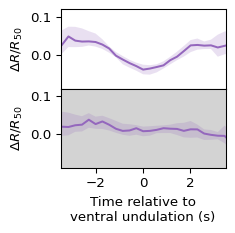

In [18]:
# STACKED triggered averages of two types: residual activity, rectified by either fwd or rev
trigger_types = ['residual_rectified_fwd', 'residual_rectified_rev',]
neuron_list =  ['VB02']

output_folder = '.'

for neuron in neuron_list:
    # This function has LOTS of options, but most of them are just slight changes to the plotting
    
    opt = dict(ylim=[-0.09, 0.12], xlim=[-3.5, 3.5], height_factor=0.23, width_factor=0.3)
    fig, ax = triggered_average_plotter.plot_triggered_average_single_neuron(neuron, trigger_types, title=neuron, show_title=False, output_folder=output_folder, **opt)
    plt.show(fig)